In [1]:
# Transformação dos Dados
import pandas as pd

df = pd.read_csv("dataset_corrigido.csv")

In [2]:
# Criação da variável Decade (década de lançamento)
df['Decade'] = (df['Year'] // 10) * 10

In [3]:
# Cálculo de proporções regionais (%NA_Sales, %EU_Sales, etc.)
df['%NA_Sales'] = df['NA_Sales'] / df['Global_Sales']
df['%EU_Sales'] = df['EU_Sales'] / df['Global_Sales']
df['%JP_Sales'] = df['JP_Sales'] / df['Global_Sales']
df['%Other_Sales'] = df['Other_Sales'] / df['Global_Sales']

In [4]:
# Normalização de variáveis numéricas
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df_normalized = df.copy()
df_normalized[sales_cols] = scaler.fit_transform(df[sales_cols])

In [5]:
df_normalized.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,%NA_Sales,%EU_Sales,%JP_Sales,%Other_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,0.096409,0.008959,0.0,0.004730,0.051976,1980,0.928074,0.060325,0.0,0.011601
1,545,Missile Command,2600,1980,Shooter,Atari,0.061702,0.005858,0.0,0.002838,0.033241,1980,0.927536,0.061594,0.0,0.010870
2,1768,Kaboom!,2600,1980,Misc,Activision Blizzard,0.025789,0.002412,0.0,0.000946,0.013780,1980,0.930435,0.060870,0.0,0.008696
3,1971,Defender,2600,1980,Misc,Atari,0.023861,0.001723,0.0,0.000946,0.012571,1980,0.942857,0.047619,0.0,0.009524
4,2671,Boxing,2600,1980,Fighting,Activision Blizzard,0.017354,0.001378,0.0,0.000946,0.009187,1980,0.935065,0.051948,0.0,0.012987
5,4027,Ice Hockey,2600,1980,Sports,Activision Blizzard,0.011087,0.001034,0.0,0.000946,0.005802,1980,0.938776,0.061224,0.0,0.020408
6,5368,Freeway,2600,1980,Action,Activision Blizzard,0.007713,0.000689,0.0,0.000000,0.003989,1980,0.941176,0.058824,0.0,0.000000
7,6319,Bridge,2600,1980,Misc,Activision Blizzard,0.006026,0.000689,0.0,0.000000,0.003143,1980,0.925926,0.074074,0.0,0.000000
8,6898,Checkers,2600,1980,Misc,Atari,0.005302,0.000345,0.0,0.000000,0.002780,1980,0.916667,0.041667,0.0,0.000000
9,240,Pitfall!,2600,1981,Platform,Activision Blizzard,0.101470,0.008270,0.0,0.004730,0.054273,1980,0.935556,0.053333,0.0,0.011111


In [6]:
# Agregações por categoria
df.groupby('Genre')['Global_Sales'].agg(['mean', 'sum', 'count']).sort_values('sum', ascending=False).head()

df.groupby('Platform')['Global_Sales'].agg(['mean', 'sum', 'count']).sort_values('sum', ascending=False).head()

df.groupby('Decade')['Global_Sales'].agg(['mean', 'sum', 'count']).sort_values('Decade').head()


,mean,sum,count
Decade,,,
1980,1.836976,376.58,205
1990,0.722956,1278.91,1769
2000,0.504855,4636.08,9183
2010,0.490962,2520.11,5133
2020,0.290000,0.29,1


In [7]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,%NA_Sales,%EU_Sales,%JP_Sales,%Other_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31,1980,0.928074,0.060325,0.0,0.011601
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76,1980,0.927536,0.061594,0.0,0.010870
2,1768,Kaboom!,2600,1980,Misc,Activision Blizzard,1.07,0.07,0.0,0.01,1.15,1980,0.930435,0.060870,0.0,0.008696
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05,1980,0.942857,0.047619,0.0,0.009524
4,2671,Boxing,2600,1980,Fighting,Activision Blizzard,0.72,0.04,0.0,0.01,0.77,1980,0.935065,0.051948,0.0,0.012987
5,4027,Ice Hockey,2600,1980,Sports,Activision Blizzard,0.46,0.03,0.0,0.01,0.49,1980,0.938776,0.061224,0.0,0.020408
6,5368,Freeway,2600,1980,Action,Activision Blizzard,0.32,0.02,0.0,0.00,0.34,1980,0.941176,0.058824,0.0,0.000000
7,6319,Bridge,2600,1980,Misc,Activision Blizzard,0.25,0.02,0.0,0.00,0.27,1980,0.925926,0.074074,0.0,0.000000
8,6898,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.0,0.00,0.24,1980,0.916667,0.041667,0.0,0.000000
9,240,Pitfall!,2600,1981,Platform,Activision Blizzard,4.21,0.24,0.0,0.05,4.50,1980,0.935556,0.053333,0.0,0.011111


In [8]:
# Clusterização e redução de dimensionalidade
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# selecionar as colunas de interesse (normalizadas)
X = df[['%NA_Sales', '%EU_Sales', '%JP_Sales', '%Other_Sales']]

# aplicar KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# reduzir dimensionalidade com PCA (2 componentes)
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X)

df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


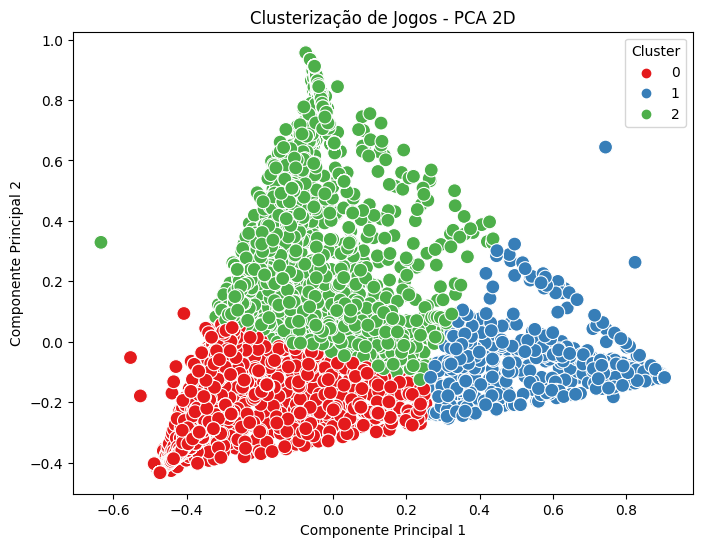

In [9]:
# Visualizar os clusters

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='Cluster', palette='Set1', s=100)
plt.title('Clusterização de Jogos - PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()


In [10]:
# variância explicada
variance_ratio = pca.explained_variance_ratio_
print(f"PCA1: {variance_ratio[0]*100:.2f}%")
print(f"PCA2: {variance_ratio[1]*100:.2f}%")
print(f"Variância total explicada: {variance_ratio.sum()*100:.2f}%")

PCA1: 70.73%
PCA2: 26.93%
Variância total explicada: 97.66%


In [11]:
# salvando o DataFrame final
df.to_csv("vgsales_final.csv", index=False)

In [12]:
display(df)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,%NA_Sales,%EU_Sales,%JP_Sales,%Other_Sales,Cluster,pca1,pca2
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31,1980,0.928074,0.060325,0.0,0.011601,0,-0.440863,-0.344311
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76,1980,0.927536,0.061594,0.0,0.010870,0,-0.440719,-0.343096
2,1768,Kaboom!,2600,1980,Misc,Activision Blizzard,1.07,0.07,0.00,0.01,1.15,1980,0.930435,0.060870,0.0,0.008696,0,-0.442189,-0.345531
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05,1980,0.942857,0.047619,0.0,0.009524,0,-0.447337,-0.362794
4,2671,Boxing,2600,1980,Fighting,Activision Blizzard,0.72,0.04,0.00,0.01,0.77,1980,0.935065,0.051948,0.0,0.012987,0,-0.443656,-0.354645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16286,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01,2010,0.000000,0.000000,1.0,0.000000,1,0.905394,-0.118133
16287,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03,2010,0.000000,0.000000,1.0,0.000000,1,0.905394,-0.118133
16288,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,2010,0.000000,0.000000,1.0,0.000000,1,0.905394,-0.118133
16289,16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,2010,0.000000,0.000000,1.0,0.000000,1,0.905394,-0.118133
